<a href="https://colab.research.google.com/github/YusufAlperGulden/Yapay-Zeka-Deep-Learning/blob/main/Neural_Network_For_Handwritten_Digits_Classification_%7C_Deep_Learning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train[0].shape

(28, 28)

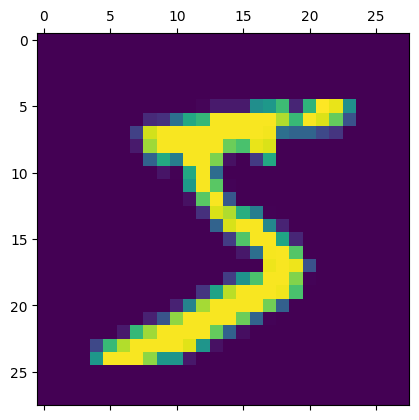

In [5]:
plt.matshow(x_train[0])

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
x_train=x_train/255
x_test=x_test/255

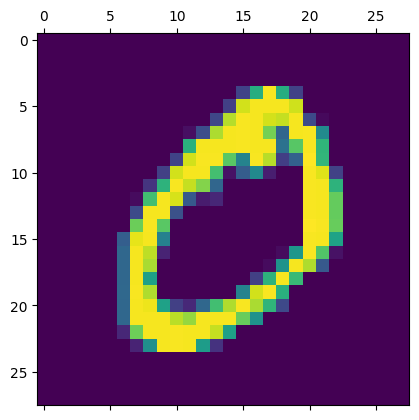

In [8]:
plt.matshow(x_train[1])

In [9]:
x_train.shape #60000 images that has 28x28 pixels size

(60000, 28, 28)

In [10]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [11]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8094 - loss: 0.7287
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9113 - loss: 0.3142
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9213 - loss: 0.2837
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9237 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9266 - loss: 0.2654


In [13]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9165 - loss: 0.3031


[0.26824307441711426, 0.9259999990463257]

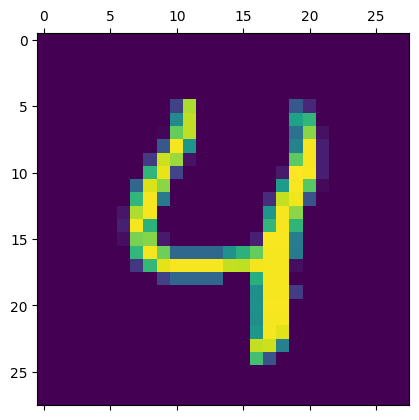

In [14]:
plt.matshow(x_test[4]) #Displaythe first image in your test dataset.

In [15]:
y_predicted=model.predict(x_test_flatten)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([4.5768741e-01, 5.1475060e-03, 9.9949604e-01, 4.0100217e-01,
       5.9653027e-10, 7.4501091e-01, 8.9263618e-01, 1.6786180e-12,
       1.3312872e-01, 2.1322808e-09], dtype=float32)

In [16]:
python_int = int(np.argmax(y_predicted[1]))
print(python_int)

2


In [17]:
y_test[:5]#Show the labels for the first 5 images in the "test" set.

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    1,    0,    5,    8,    3,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    7,  933,   16,    8,    2,   13,   11,   36,    2],
       [   3,    0,   22,  920,    0,   19,    3,   13,   25,    5],
       [   1,    1,    5,    1,  919,    0,   11,    4,   11,   29],
       [  10,    1,    4,   39,   11,  754,   18,    9,   39,    7],
       [   9,    3,    5,    1,    7,    6,  922,    2,    3,    0],
       [   1,    5,   23,    3,    8,    0,    0,  963,    4,   21],
       [   5,    5,    7,   18,    9,   16,   10,   14,  886,    4],
       [  10,    5,    1,   10,   35,    5,    0,   35,   13,  895]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

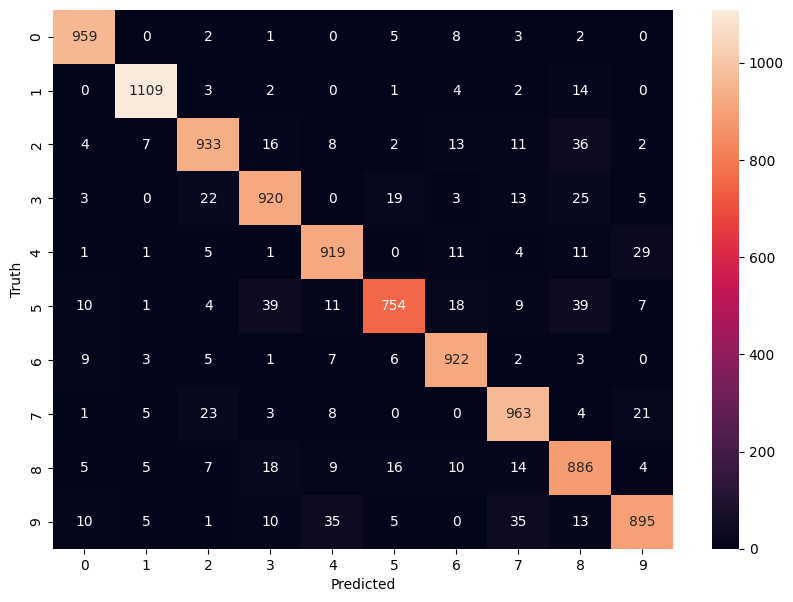

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8694 - loss: 0.4580
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9614 - loss: 0.1359
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.0885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0645
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9850 - loss: 0.0493
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9881 - loss: 0.0397
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9904 - loss: 0.0314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9920 - loss: 0.0265
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9940 - loss: 0.0204
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9954 - loss: 0.0164
